IMPORT PACKAGES

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

LOADING DATA

In [31]:
df=pd.read_csv("Student_Marks.csv")
df.head(15)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


ANALYZE DATA

In [32]:
#Check if the dataset contains null values or not
print(df.isnull().sum()) #prints the number of missing values in each column of the DataFrame.

number_courses    0
time_study        0
Marks             0
dtype: int64


In [33]:
#check the number of values that the feature number_courses take, and how many of these values are being assigned
df["number_courses"].value_counts() 

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

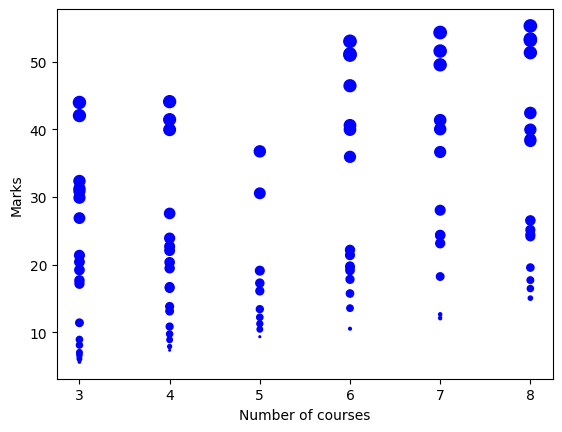

In [34]:
scaled_time_study=df.time_study*10 #without this scaled, the points are not diferencieted well enough
plt.scatter(df.number_courses,df.Marks,s=scaled_time_study,color="blue") #s is the size of the circles
plt.xlabel("Number of courses")
plt.ylabel("Marks")
plt.show()

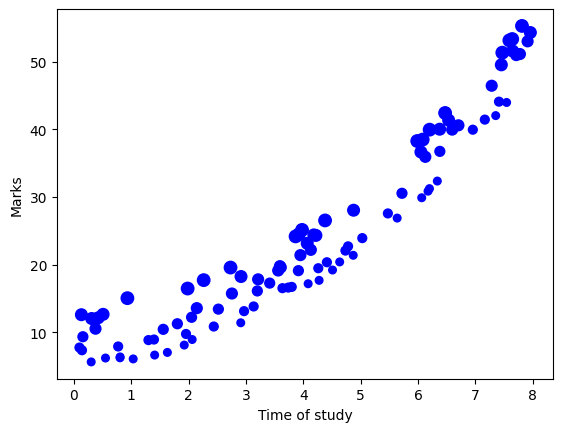

In [35]:
scaled_number_courses=df.number_courses*10
plt.scatter(df.time_study,df.Marks,s=scaled_number_courses,color="blue")
plt.xlabel("Time of study")
plt.ylabel("Marks")
plt.show()

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64


<Axes: >

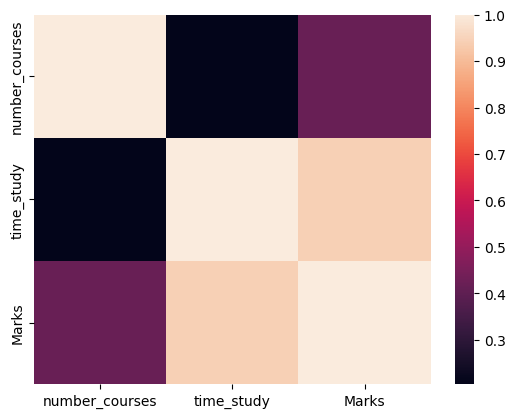

In [36]:
#Now lets analyze and visualize the correlation between features
import seaborn as sns
correlation=df.corr()
print(correlation["Marks"].sort_values(ascending=False)) #Print the correlation between the feature "Marks" to the rest of the features||  sort_values(ascending=False) ensures that the values are printed from the highest to the lowwest of the correlation
sns.heatmap(correlation)

PREDICTION OF THE STUDEND MARKS

In [43]:
#Lets split our dataset into using random 80% of the data for training and the rest 20% for testing.
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [44]:
#MODELING using sklearn package
regr=linear_model.LinearRegression()
x_train=np.asanyarray(train[["number_courses","time_study"]])
y_train=np.asanyarray(train["Marks"])
x_test=np.asanyarray(test[["number_courses","time_study"]])
y_test=np.asanyarray(test["Marks"])
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.9517280735760266

PREDICT USING THE MODEL

In [49]:
#test_values=[["number_courses","time_study"]]
test_values=np.array([[4,4.5]])
regr.predict(test_values)

array([24.45528147])